## Esame di Metodi Numerici 6 Maggio 2024 

## Esercizo 1
- Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``'test_14_09_2023.mat'``.  Risolvere il sistema confrontando almeno due tra i metodi  visti  per utilizzare per risolvere il sistema lineare con tale matrice dei coefficienti. Confrontare i risultati dei vari metodi, e giustificare i loro comportamento utilizzando i risultati teorici visti a lezione.
- 
Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('test_06_05_2024.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``


                                       [10 punti]
                                         


Percentuale elementi diversi da zero 1.2449999999999999
Matrice è simmetrica
Matrice definita positiva True
matrice ben condizionata
Matrice non sparsa


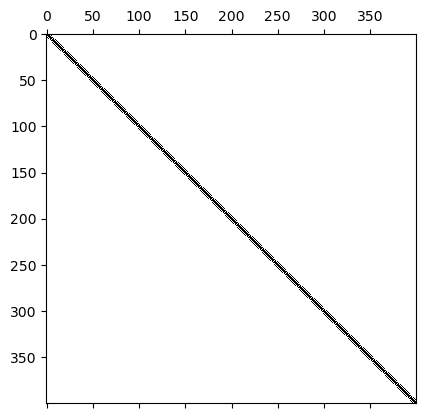

In [3]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl
import scipy as sp
import scipy.linalg as spl
import matplotlib.pyplot as plt
import SolveTriangular

import numpy as np

dati = loadmat('test_06_05_2024.mat')
A=dati["A"]
A=A.astype(float)
b=dati["b"] 
b=b.astype(float)
m = 400 
n = 400
nz = np.count_nonzero(A)/(n*m)
perc_nz = nz * 100
print("Percentuale elementi diversi da zero", perc_nz)
#sparsa se hai più di due terzi di valori uguali a zero

plt.spy(A)
#A è di grandi dimensioni, poco densa, sparsa, ben condizionata, inoltre dalla stampa risulta essere simmetrica.
K = npl.cond(A)
#ben condizionata se K è maggiore di 10^n n = 0,1,2,3
#Decico quindi di usare Gauss Siedel e Metodo di discesa del Gradiente congiunto


nz = np.count_nonzero(A)/(n*m)
perc_nz = nz * 100
if np.all(A == A.T) == 0:
    print("Matrice non simmetrica")
else:
    print("Matrice è simmetrica")
    autovalori = npl.eigvals(A)
    flag_dp = np.all(autovalori>0)
    print("Matrice definita positiva", flag_dp)

if K < 10**3:
    print("matrice ben condizionata")
else:
    print("Matrice mal condizionata")

if perc_nz > 66:
    print("Matrice sparsa")
else:
    print("Matrice non sparsa")



In [4]:
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
   
   
   # inizializzare le variabili necessarie
    x = x0
   
    r = A.dot(x)-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A.dot(p)
        alpha = -(r.T@p)/(p.T@Ap)
        x = x + alpha *p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma=r.T@r/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r+gamma*p  #La nuova direzione appartiene al piano individuato da -r e p. gamma è scelto in maniera tale che la nuova direzione
        #sia coniugata rispetto alla direzione precedente( che geometricamente significa che punti verso il centro)
   
   
    return x,vet_r,vec_sol,it


In [5]:
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F
    T=np.dot(np.linalg.inv(M),N)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<=it_max and errore>=toll:
        temp=b-F@x0
        x,flag=SolveTriangular.Lsolve(M,temp)  #Calcolare la soluzione al passo k equivale a calcolare la soluzione del sistema triangolare con matrice M=D+E
                               # e termine noto b-F@x0
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet




raggio spettrale Gauss-Seidel  0.7976726500691322
iterazioni= 70
iterazioni= 36


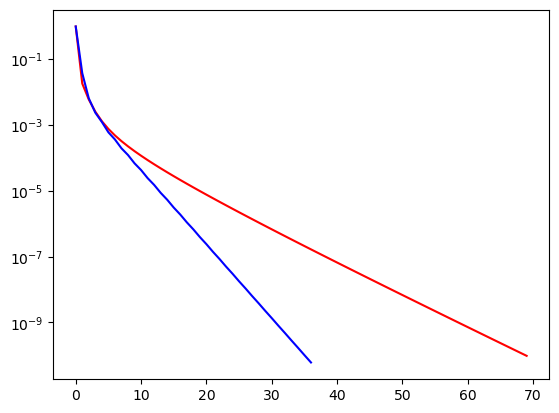

In [9]:
x0 = np.zeros_like(b)
toll = 1e-10
it_max = 500
x,it,err = gauss_seidel(A,b,x0,toll,it_max)

print("iterazioni=",it)
plt.semilogy(range(it), err, '-r')

x1,vet_r,vec_sol,it = conjugate_gradient(A,b,x0,it_max,toll)

print("iterazioni=",it)
plt.semilogy(range(it+1), vet_r, '-b')

- Data la matrice 
$$A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],$$
Richiamare le ipotesi sotto cui esiste la fattorizzazione di Gauss senza pivoting e scrivere un codice per  verificarle.

                                                [2 punti]

## Esercizio 2
Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange, $n=5,10,15,18$

- nodi $x_i$, punti equidistanti in un intervallo $[a, b]$,
- nodi $x_i$, zeri dei polinomi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ della funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. 
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).
  
                                          [6] punti

- Calcolare l'errore di interpolazione $r(x) =  f(x)-pe(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $pe(x)$ calcolato a partire da nodi equdisitanti.
                                        [1] punto
                                        
Visualizzare il grafico di $f(x)$ e $pe(x)$, ed il grafico di $|r(x)|$ per ogni valore $n=5,10,15,18$ 

                                        [1] punto
                                        
Calcolare l'errore di interpolazione $r(x) =  f(x)-pc(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$ calcolato a partire da nodi di Chebichev.

                                      [1] punto
                                            
Visualizzare il grafico di $f(x)$ e $pc(x)$, ed il grafico di $|r(x)|$. 

                                       [1] punto

Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$? Scrivere la formula dell'errore che si compie quando al posto della funzione che ha generato i dati si considera il polinomio interpolatore di grado n e commentarla.
                                         
                                         [3 punti]

**Domanda AI**

- Descrivere gli elementi caratterizzanti di un MultiLayer Perceptron (MLP).( Com'è fatto un neurone artificiale, a caso servono le funzioni di attivazione, come sono organizzati i neuroni. Varie tipologie di reti MLP)  ed accennare in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**

- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 1**  
 - Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**
- Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**
 - Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**
 
 **Totale:  7**